In [95]:
#import and setup
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt
from pprint import pprint
from datetime import datetime
import numpy as np

finn_key = 'sandbox_cc7v412ad3i03fardc9g'

#import finnhub
import finnhub
finnhub_client = finnhub.Client(api_key=finn_key)

#finnhub utcdate codes for slicing by year for each stock
#2019 times
beg_2019 = 1546300800
end_2019 = 1577836799
#2020 times
beg_2020 = 1577836800
end_2020 = 1609459199
#2021 times
beg_2021 = 1609459200
end_2021 = 1640995199


In [96]:
#def function to create a dataframe for each stock
def stock_df(stock_name, beg_year, end_year):
    df_name = pd.DataFrame(finnhub_client.stock_candles(stock_name, 'W', beg_year, end_year)) 
    df_name = df_name.drop(['s'], axis=1)
    rename = {'c':'Close','h': 'High', 'l': 'Low', 'o': 'Open', 't': 'Time', 'v': 'Volume'}
    df_name.rename(columns=rename, inplace=True)
    df_name['Time'] = [datetime.utcfromtimestamp(x).strftime('%Y-%m-%d') for x in df_name['Time']]
    return df_name

In [97]:
def plot_chart(dataframe):
    return('hello no plotting done yet')

In [103]:
microsoft = stock_df('MSFT', beg_2020, end_2020)
stock_date = microsoft.set_index('Time')
stock_date

,Close,High,Low,Open,Volume
Time,,,,,
2019-12-26,122.815500,123.492000,122.631000,123.000000,30
2020-01-02,123.036334,123.245016,122.385738,122.754000,18
2020-01-09,123.121433,123.799619,122.936474,123.306393,68
2020-01-16,122.875191,123.552019,122.690601,123.059780,46
2020-01-23,122.629440,123.304915,122.445220,122.813661,26


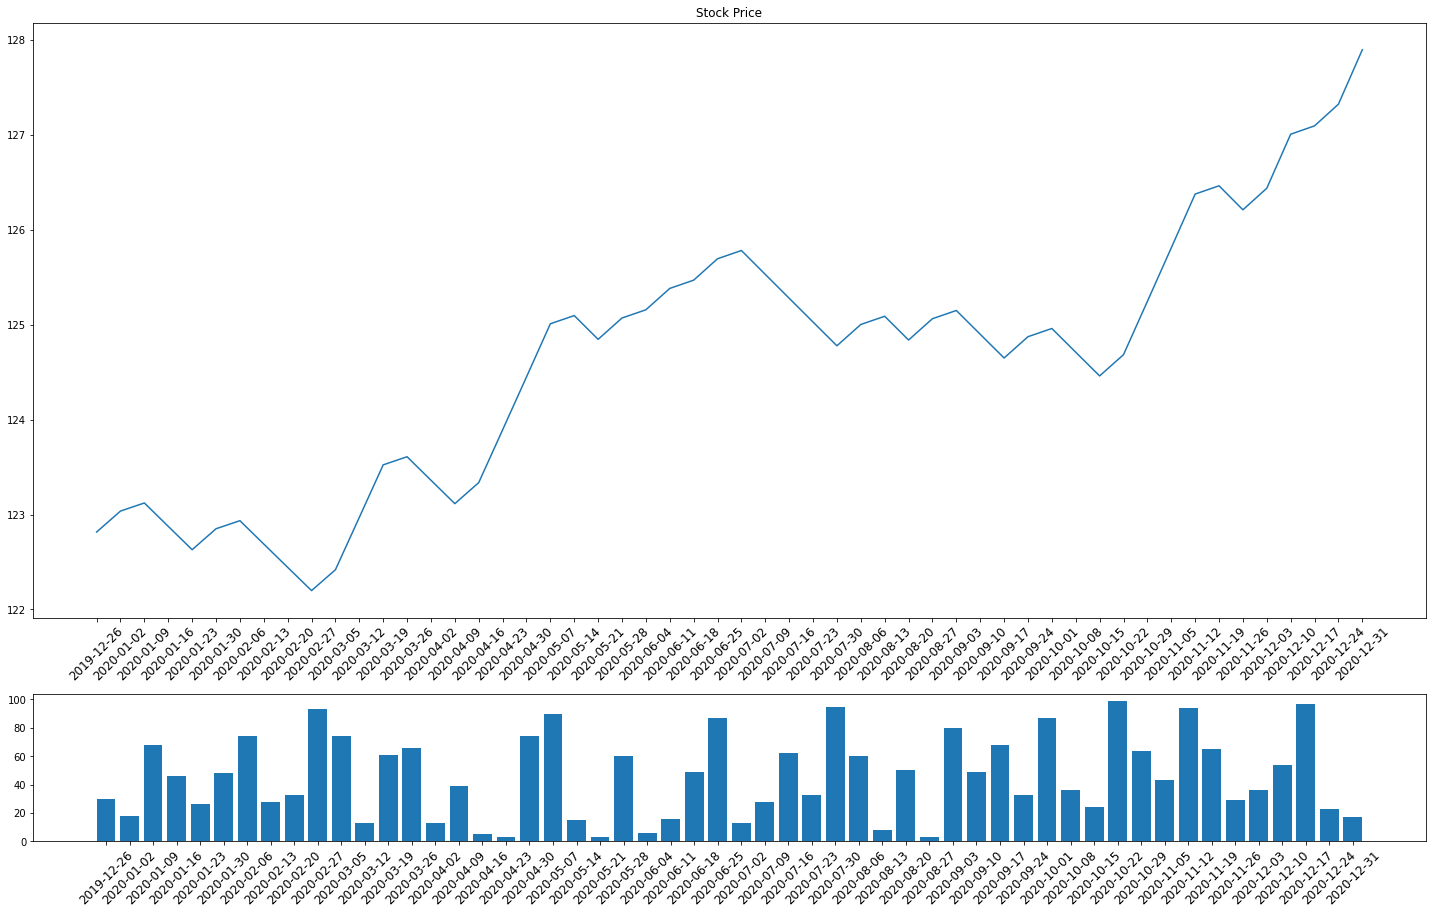

In [111]:
fig= plt.figure(figsize=(20,15))
top_plt = plt.subplot2grid((5,4), (0,0), rowspan=3, colspan=4)
top_plt.plot(stock_date.index, stock_date['Close'])
plt.xticks(rotation=45, fontsize=12)
plt.title('Stock Price')
bottom_plt = plt.subplot2grid((5,4),(3,0), rowspan=1, colspan=4)
bottom_plt.bar(stock_date.index, stock_date['Volume'])
plt.xticks(rotation=45, fontsize=12)
fig.tight_layout();